In [1]:
import sympy as sp
sf = sp.SingularityFunction

In [158]:
# Define the symbols
Av, Am, Bv, Cv1, Cv2, Ch1, Ch2, Ah = sp.symbols('A_v, A_m, B_v, C_{v1}, C_{v2}, C_{h1}, C_{h2}, A_h')
s = sp.symbols('s')
# Define the equations
qz = Av * sf(s,0,-1) + Bv * sf(s,10,-1) + Cv1 * sf(s,10+0.01,-1) + \
    Cv2 * sf(s,15,-1) - 20 * sf(s,20,-1) + Am * sf(s,0,-2)
qz = sp.nsimplify(qz)
display(qz)


A_m*SingularityFunction(s, 0, -2) + A_v*SingularityFunction(s, 0, -1) + B_v*SingularityFunction(s, 10, -1) + C_{v1}*SingularityFunction(s, 1001/100, -1) + C_{v2}*SingularityFunction(s, 15, -1) - 20*SingularityFunction(s, 20, -1)

In [160]:
qx  = Ah * sf(s,0,-1) + Ch1 * sf(s,10+0.01,-1) + Ch2 * sf(s,15,-1)
qx = sp.nsimplify(qx)
display(qx)


A_h*SingularityFunction(s, 0, -1) + C_{h1}*SingularityFunction(s, 1001/100, -1) + C_{h2}*SingularityFunction(s, 15, -1)

In [161]:
C1, C2, C3, C4, C5, C6 = sp.symbols('C1, C2, C3, C4, C5, C6')

In [162]:
V = -sp.integrate(qz,s) + C1
M = sp.integrate(V,s) + C2
kappa = M #/ EI
phi = sp.integrate(kappa,s)+C3
w = - sp.integrate(phi,s)+C4
N = -sp.integrate(qx,s)+C5
u = -sp.integrate(N,s)+C6
display(w)

A_m*SingularityFunction(s, 0, 2)/2 + A_v*SingularityFunction(s, 0, 3)/6 + B_v*SingularityFunction(s, 10, 3)/6 - C1*s**3/6 - C2*s**2/2 - C3*s + C4 + C_{v1}*SingularityFunction(s, 1001/100, 3)/6 + C_{v2}*SingularityFunction(s, 15, 3)/6 - 10*SingularityFunction(s, 20, 3)/3

In [163]:
eq1 = sp.Eq(u.subs(s,0),0)
eq2 = sp.Eq(w.subs(s,0),0)
eq3 = sp.Eq(phi.subs(s,0),0)
eq4 = sp.Eq(M.subs(s,-1),0)
eq5 = sp.Eq(V.subs(s,-1),0)
eq6 = sp.Eq(N.subs(s,-1),0)
eq7 = sp.Eq(N.subs(s,21),0)
eq8 = sp.Eq(M.subs(s,21),0)
eq9 = sp.Eq(V.subs(s,21),0)

In [164]:
eq10 = sp.Eq(w.subs(s,10),0)
eq11 = sp.Eq(V.subs(s,sp.S(10.01+0.0001)),-V.subs(s,sp.S(10.01-0.0001)))
eq12 = sp.Eq(N.subs(s,sp.S(10.01+0.0001)),-N.subs(s,sp.S(10.01-0.0001)))
eq13 = sp.Eq(V.subs(s,15+0.0001),N.subs(s,15-0.0001))
eq14 = sp.Eq(N.subs(s,15+0.0001),-V.subs(s,15-0.0001))

In [165]:
sol = sp.solve([eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9,eq10,eq11,eq12,eq13,eq14],[C1, C2, C3, C4, C5, C6, Av, Am, Bv, Cv1, Cv2, Ch1, Ch2, Ah])

In [166]:
display(sol)

{C6: 0,
 C1: 0,
 C2: 0,
 C3: 0,
 C4: 0,
 C5: 0,
 A_v: -15,
 A_m: 50,
 B_v: 15,
 C_{v1}: 0,
 C_{v2}: 20,
 C_{h1}: 40,
 C_{h2}: -20,
 A_h: -20}

In [167]:
display(M.subs(sol))

-50*SingularityFunction(s, 0, 0) + 15*SingularityFunction(s, 0, 1) - 15*SingularityFunction(s, 10, 1) - 20*SingularityFunction(s, 15, 1) + 20*SingularityFunction(s, 20, 1)

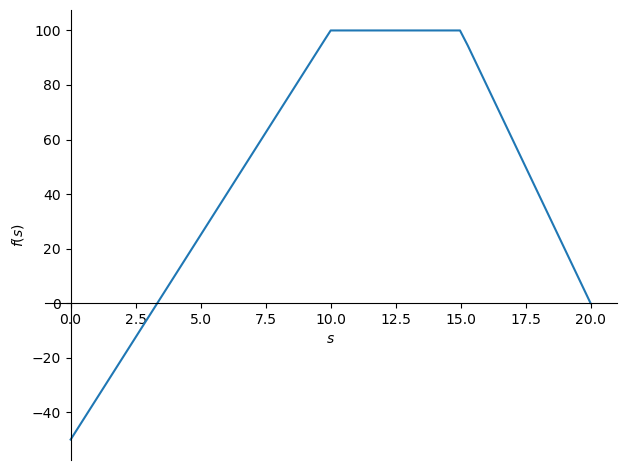

In [168]:
sp.plot(M.subs(sol),(s,0,20))

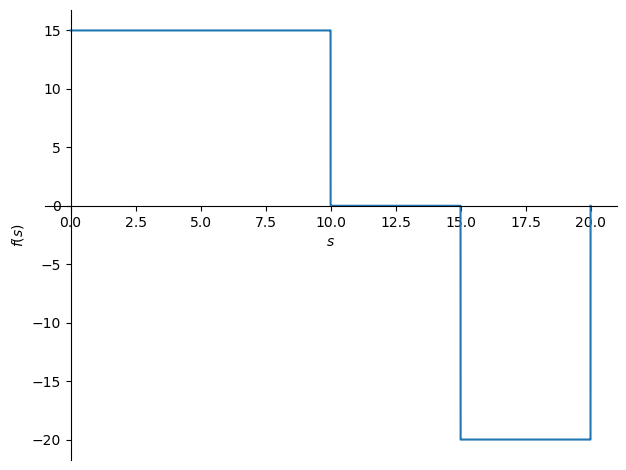

In [150]:
sp.plot(V.subs(sol),(s,0,20))

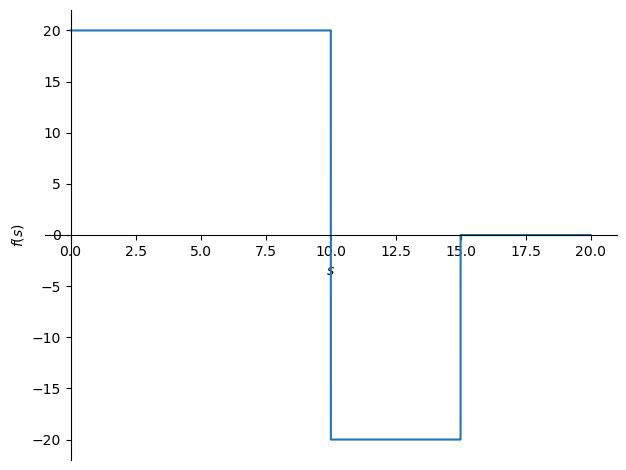

In [116]:
sp.plot(N.subs(sol),(s,0,20))